**PARHELION GROUP**

# LAB2:Lab Police d'Assurance sur Caravane 

**Business Objectives<br/>**
Identifier les clients qui peuvent être intéressés par la police d’assurance sur caravane

**Data science Objectives<br/>**
Faire des clustering pour detecter des patterns <br/>
Faire un profiling de la clientèle <br/>
Deduire des regles associatives qui peut nous aider à cibler es client potentiels <br/>
Réaliser une classification afin d'affecter un score à chaque zone en déterminant un seuil qui nous aide à toucher la moitié de l'échantillion

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='dop1943', api_key='NvAwePHfIoQOqrUPupxc')
from sklearn.decomposition import PCA
from sklearn import preprocessing
from feature_selector import FeatureSelector
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Chargement et préparation des données

In [59]:
data = pd.read_table("AssurancExpertsInc.txt")

In [60]:
data.shape

(9822, 87)

In [61]:
data.columns

Index(['SD1', 'SD2', 'SD3', 'SD4', 'SD5', 'SD6', 'SD7', 'SD8', 'SD9', 'SD10',
       'SD11', 'SD12', 'SD13', 'SD14', 'SD15', 'SD16', 'SD17', 'SD18', 'SD19',
       'SD20', 'SD21', 'SD22', 'SD23', 'SD24', 'SD25', 'SD26', 'SD27', 'SD28',
       'SD29', 'SD30', 'SD31', 'SD32', 'SD33', 'SD34', 'SD35', 'SD36', 'SD37',
       'SD38', 'SD39', 'SD40', 'SD41', 'SD42', 'SD43', 'PO44', 'PO45', 'PO46',
       'PO47', 'PO48', 'PO49', 'PO50', 'PO51', 'PO52', 'PO53', 'PO54', 'PO55',
       'PO56', 'PO57', 'PO58', 'PO59', 'PO60', 'PO61', 'PO62', 'PO63', 'PO64',
       'PO65', 'PO66', 'PO67', 'PO68', 'PO69', 'PO70', 'PO71', 'PO72', 'PO73',
       'PO74', 'PO75', 'PO76', 'PO77', 'PO78', 'PO79', 'PO80', 'PO81', 'PO82',
       'PO83', 'PO84', 'PO85', 'CLASS', 'STATUS'],
      dtype='object')

On commence par changer le nom des variables pour qu'elle soient plus signifiantes

In [62]:
file = "DETAILED DATA DESCRIPTION.txt"
with open(file, "r") as f:
        desc = f.read()
desc = str(desc).split('\n')
desc = [l for l in desc if l != '']
desc = desc[4:]
desc = desc[:-95]

In [63]:
for i in range (len(desc)):
    a=desc[i].find(" ")
    b=desc[i].find(" ",a+1)
    desc[i]=desc[i][b+1:]
desc[0]="Customer Subtype"
desc[1]="Number of houses"
desc[2]="Avg size household"
desc[3]="Avg age"
desc[4]="Customer main type"
desc[5]="Roman catholic"
desc[6]="Protestant"
desc.append("Class")
desc.append("Status")
data.columns=desc
data1=data.copy()
ClassData=data.copy()

In [8]:
data.columns

Index(['Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age',
       'Customer main type', 'Roman catholic', 'Protestant', 'Other religion',
       'No religion', 'Married', 'Living together', 'Other relation',
       'Singles', 'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Entrepreneur', 'Farmer',
       'Middle management', 'Skilled labourers', 'Unskilled labourers',
       'Social class A', 'Social class B1', 'Social class B2',
       'Social class C', 'Social class D', 'Rented house', 'Home owners',
       '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income < 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income >123.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance see L4',
       'Contribution third party insurance

Changeons à présent les modalités dans les variables pour qu'elle soient plus compréhensibles

In [64]:
l0=pd.read_table("Caravane L0.txt")
n=l0.shape[0]
for i in range(n):
    data["Customer Subtype"].replace(to_replace={l0.iloc[i,1]:l0.iloc[i,2]},inplace=True)

In [65]:
l1=pd.read_table("Caravane L1.txt")
n=l1.shape[0]
for i in range(n):
    data["Avg age"].replace(to_replace={l1.iloc[i,0]:l1.iloc[i,1]},inplace=True)

In [66]:
l2=pd.read_table("Caravane L2.txt")
n=l2.shape[0]
for i in range(n):
    data["Customer main type"].replace(to_replace={l2.iloc[i,0]:l2.iloc[i,1]},inplace=True)

In [67]:
l3=pd.read_table("Caravane L3.txt")
n=l3.shape[0]
for j in data.columns[5:43]:
    for i in range(n):
        data[j].replace(to_replace={l3.iloc[i,0]:l3.iloc[i,1]},inplace=True)

In [68]:
l4=pd.read_table("Caravane L4.txt",sep=" f ",engine="python")
n=l4.shape[0]
for j in data.columns[43:85]:
    for i in range(n):
        data[j].replace(to_replace={l4.iloc[i,0]:l4.iloc[i,1]},inplace=True)

In [14]:
data.head()

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Class,Status
0,Lower class large families,1,3,30-40 years,Family with grown ups,0%,50-62%,1-10%,24-36%,76-88%,...,0,0,1 – 49,0,0,0,0,0,No,Learning
1,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,1-10%,37-49%,1-10%,37-49%,63-75%,...,0,0,1 – 49,0,0,0,0,0,No,Learning
2,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,0%,37-49%,11-23%,37-49%,24-36%,...,0,0,1 – 49,0,0,0,0,0,No,Learning
3,"Modern, complete families",1,3,40-50 years,Average Family,11-23%,24-36%,11-23%,37-49%,50-62%,...,0,0,1 – 49,0,0,0,0,0,No,Learning
4,Large family farms,1,4,30-40 years,Farmers,1-10%,37-49%,1-10%,37-49%,76-88%,...,0,0,1 – 49,0,0,0,0,0,No,Learning


Nous allons à présent diviser notre data en demographique et produits pour la phase de visualisation des données

In [69]:
demData=data.iloc[:,0:43]
demData1=data1.iloc[:,0:43]
demData["Class"]=data.iloc[:,85]
demData["Status"]=data.iloc[:,86]
demData1["Class"]=data1.iloc[:,85]
demData1["Status"]=data1.iloc[:,86]
ProdData=data.iloc[:,43:87]
ProdData1=data1.iloc[:,43:87]
ProdData["Class"]=data.iloc[:,85]
ProdData["Status"]=data.iloc[:,86]
ProdData1["Class"]=data1.iloc[:,85]
ProdData1["Status"]=data1.iloc[:,86]

In [16]:
demData.head()

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Private health insurance,Income < 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income >123.000,Average income,Purchasing power class,Class,Status
0,Lower class large families,1,3,30-40 years,Family with grown ups,0%,50-62%,1-10%,24-36%,76-88%,...,1-10%,0%,37-49%,50-62%,0%,0%,37-49%,24-36%,No,Learning
1,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,1-10%,37-49%,1-10%,37-49%,63-75%,...,24-36%,11-23%,0%,50-62%,11-23%,0%,50-62%,37-49%,No,Learning
2,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,0%,37-49%,11-23%,37-49%,24-36%,...,0%,37-49%,50-62%,0%,0%,0%,24-36%,37-49%,No,Learning
3,"Modern, complete families",1,3,40-50 years,Average Family,11-23%,24-36%,11-23%,37-49%,50-62%,...,11-23%,1-10%,50-62%,24-36%,0%,0%,37-49%,37-49%,No,Learning
4,Large family farms,1,4,30-40 years,Farmers,1-10%,37-49%,1-10%,37-49%,76-88%,...,37-49%,0%,0%,100%,0%,0%,63-75%,24-36%,No,Learning


# Data Visualisation

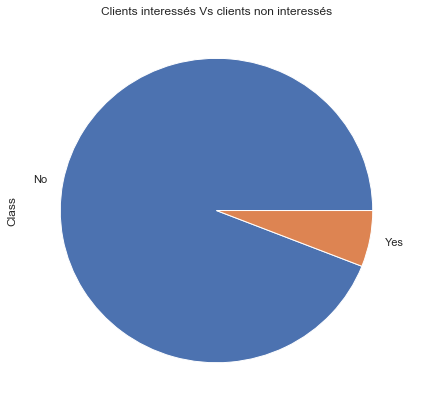

In [579]:
data["Class"].value_counts().plot(kind="pie",figsize=(7,7),title="Clients interessés Vs clients non interessés");

Nous disposons d'un grand nombre de Non et peu de oui ce qui représente une anomalie . Mais c'est tres normal vu que on peut difficilement trouver un nombre égal de personnes interessees par des caravanes .

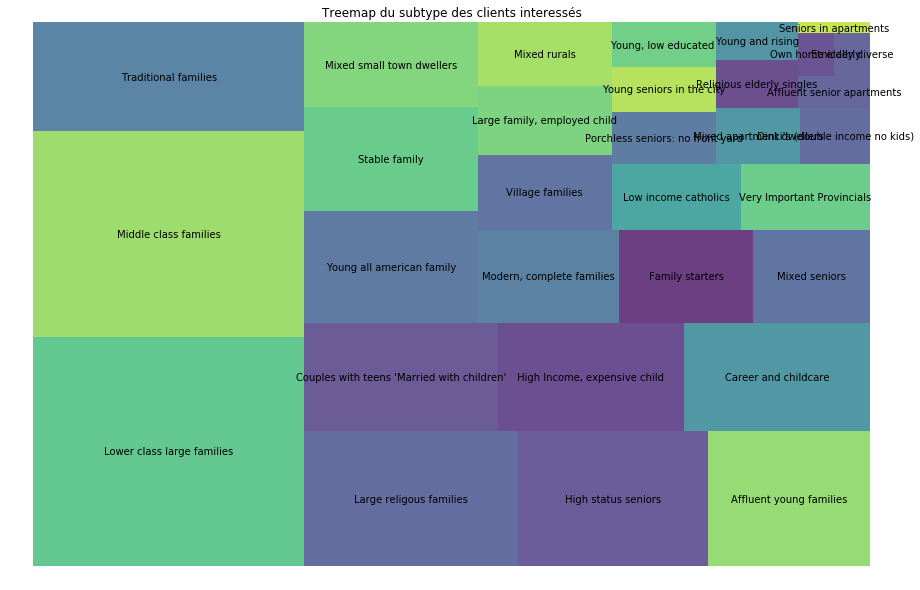

<Figure size 432x288 with 0 Axes>

In [29]:
import squarify
pl=plt.figure(figsize=(15,10))
# If you have 2 lists
squarify.plot(sizes=data.loc[data.Class=="Yes","Customer Subtype"].value_counts().tolist(), label=data.loc[data.Class=="Yes","Customer Subtype"].value_counts().index, alpha=.8 )
plt.axis('off')
plt.title("Treemap du subtype des clients interessés")
plt.show()
plt.savefig("families.png")

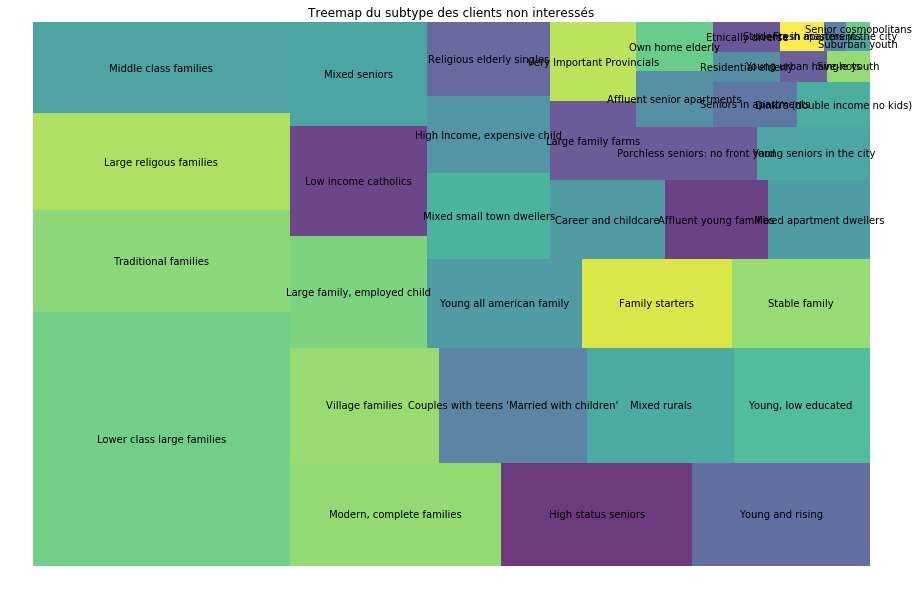

In [26]:
pl=plt.figure(figsize=(15,10))

# If you have 2 lists
squarify.plot(sizes=data.loc[data.Class=="No","Customer Subtype"].value_counts().tolist(), label=data.loc[data.Class=="No","Customer Subtype"].value_counts().index, alpha=.8 )
plt.axis('off')
plt.title("Treemap du subtype des clients non interessés")
plt.show()

On remarque que la variables dominantes dans les deux cas est Lowel Class Large Families , par contre la deuxiéme variable pour les interessés est Middle Class Families et pour les non interessés est Traditional Families .
Ce qui est normal vu que avoir une caravane est plutot pour les classes inferieures ou les classes moyennes qui ne peuvent pas posseder une maison en bord de mer par exemple .

Passons maintenant aux tranches d'age

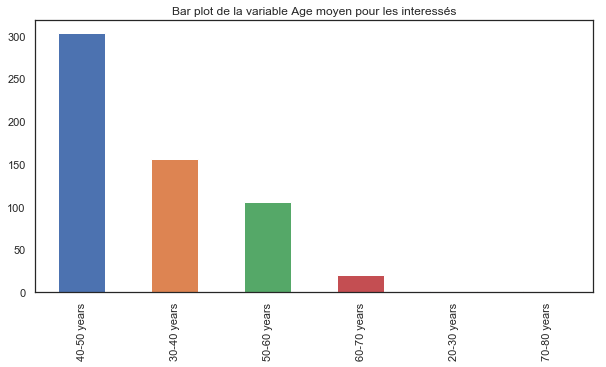

In [582]:
demData.loc[demData["Class"]=="Yes","Avg age"].value_counts().plot(kind="bar",figsize=(10,5),title="Bar plot de la variable Age moyen pour les interessés",align='center');

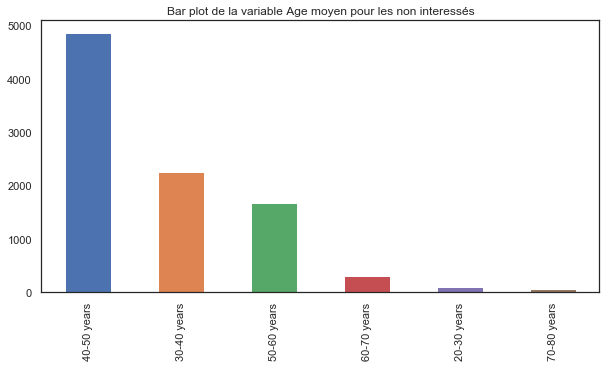

In [583]:
demData.loc[demData["Class"]=="No","Avg age"].value_counts().plot(kind="bar",figsize=(10,5),title="Bar plot de la variable Age moyen pour les non interessés",align='center');

Dans les deux cas on remarque les tranches d'age dominantes demeurent 40-50 ans  . on peut aussi remarquer la quasi inexistance de la tranche d'age 20-30 ans pour les interessés ainsi que les 70-80 ans .
Ce qui est logique vu que les plus jeunes n'ont pas encore assez d'argent pour s'offrir des caravanes et les plus vieux n'ont plus la santé et la capacité de le faire .

In [584]:
demData1["Class"].replace(to_replace={"Yes":1,"No":0},inplace=True)

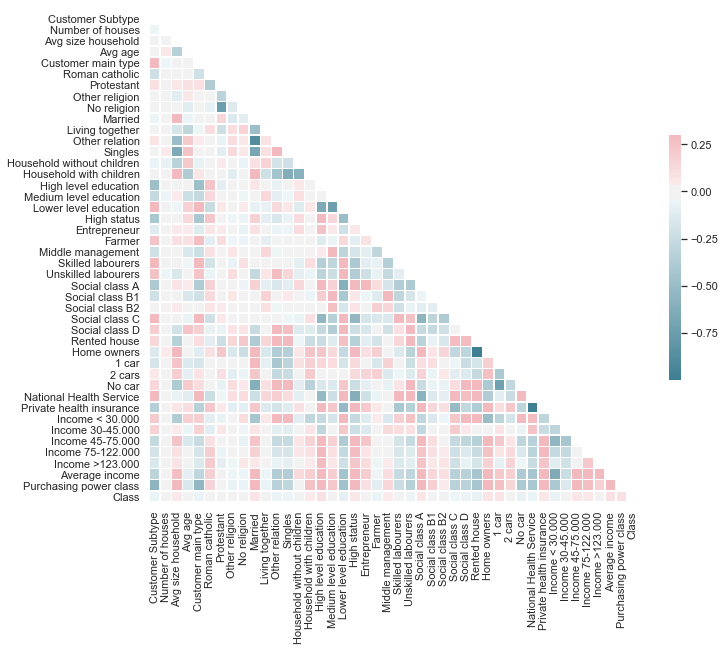

In [585]:
sns.set(style="white")

# Compute the correlation matrix
corr = demData1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
s=np.triu(np.ones(demData1.corr().abs().shape)).astype(bool).reshape(demData1.corr().abs().size)
c=demData1.corr().abs().stack()[s].sort_values(kind="quicksort",ascending=False)
c=c[c!=1]
c[c>0.8]
cDem=c[c>=0.99]

On remarque que plusieurs variables sont fortement corrélée le une avec les autres , par exemple "Rented House et Home Owners " ou encore National Health Service et Private Health insurance . Il faudra donc se séparer de l'une de ces varibles pour la partie modélisation .
On va s'interesser aux variables les plus corrélées avec la varible Classe et les ploter 

In [587]:
corr.loc[corr.Class>0.001,"Class"].sort_values(ascending=False).head(5)

Class                     1.000000
Purchasing power class    0.099018
Average income            0.085122
High level education      0.084373
Home owners               0.075283
Name: Class, dtype: float64

Interessons nous à la variable Purchasing Power Class

In [17]:
fig = {
  "data": [
    {
      "values": demData.loc[demData["Class"]=="Yes","Purchasing power class"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="Yes","Purchasing power class"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": demData.loc[demData["Class"]=="No","Purchasing power class"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="No","Purchasing power class"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Non Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Etude de la variable Purchasing Power Class",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Yes",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dop1943/0 or inside your plot.ly account where it is named 'donut'


On peut conclure par ce plot que les clients qui habitent dans des endroits ou il y a un grand pouvoir d'achat sont plus aptes à etre interessés . Donc le pouvoir d'achat est bien une variable décisive .

In [18]:
fig = {
  "data": [
    {
      "values": demData.loc[demData["Class"]=="Yes","Average income"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="Yes","Average income"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": demData.loc[demData["Class"]=="No","Average income"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="No","Average income"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Non Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Etude de la variable Average Income",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Yes",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dop1943/0 or inside your plot.ly account where it is named 'donut'


Les plots nous prouve que les clients qui ont un revenu moyen , donc plus aisés sont les plus interessés par le caravnes .

In [19]:
fig = {
  "data": [
    {
      "values": demData.loc[demData["Class"]=="Yes","High level education"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="Yes","High level education"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": demData.loc[demData["Class"]=="No","High level education"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="No","High level education"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Non Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Etude de la variable High level education",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Yes",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dop1943/0 or inside your plot.ly account where it is named 'donut'


On remarque que meme si dans les 2 classes la modalité marquantes est de 0%, la classe des intéressés montrent une portion d'individus plus important ayant eu des études supérieure avec 22% se présentant dans l'interval de 11 - 23% contre les individus non intéressés présentant 19.4 se présentant dans l'interval de 11 - 23%. De plus pour la classe des 0% est beaucoup plus importante pour les non interessés .

In [20]:
fig = {
  "data": [
    {
      "values": demData.loc[demData["Class"]=="Yes","Home owners"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="Yes","Home owners"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": demData.loc[demData["Class"]=="No","Home owners"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="No","Home owners"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Non Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Etude de la variable Home owners",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Yes",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dop1943/0 or inside your plot.ly account where it is named 'donut'


Ce plot est trés interessant , on voit bien à quel point le fait de posséder une maison peut etre décisif dans l'interet d'une personne pour les caravanes . Ansi plus de 28.2% des personnes interessées habitent dans des codes postaux dont 100% des habitant sont des propriétaires contre eulement 16.29% pour les non interessés . 10.6% habitent dans des endroits entre 89-99% etc .. 
Cela est trés logique vu que les personnes qui habitent ne possédent pas encore de maison , attendront avant d'investir dans une caravane .

In [21]:
fig = {
  "data": [
    {
      "values": demData.loc[demData["Class"]=="Yes","1 car"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="Yes","1 car"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": demData.loc[demData["Class"]=="No","1 car"].value_counts().tolist(),
      "labels": demData.loc[demData["Class"]=="No","1 car"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Non Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Etude de la variable 1 car",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Yes",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dop1943/0 or inside your plot.ly account where it is named 'donut'


Tout comme pour les maisons , on voit bien ici aussi l'importance du fait d'avoir une voiture dans l'interet à acheter une caravane .
En effet , avant d'acheter une caravane , il vaudrait mieux penser à une voiture pour la trainer .

**Conclusions : **<br>
L'étude des variables sociodémographiques nous a permit de dresser un premier profil de personnes suceptible d'investir dans
des caravanes et ce dont on peut retenir que :<br/>
-Il fait partie des familles doivent ayant plus ou moins avec un grand nombre de membres<br/>
-Il appartient à une classe moyenne<br/>
-il ne doit pas etre ni trop jeune ni trop vieux <br/>
-Il est déja propriétaire d'une maison <br/>

# Etude des attributs propriétaire de produit

In [593]:
ProdData1["Class"].replace(to_replace={"Yes":1,"No":0},inplace=True)

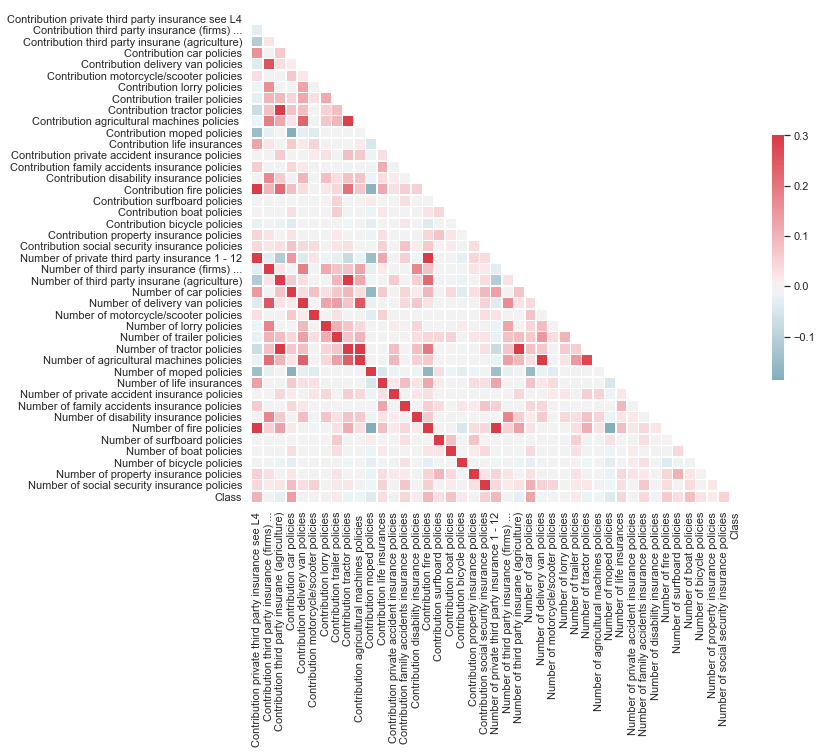

In [594]:
sns.set(style="white")

# Compute the correlation matrix
corr = ProdData1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [595]:
s=np.triu(np.ones(ProdData1.corr().abs().shape)).astype(bool).reshape(ProdData1.corr().abs().size)
c=ProdData1.corr().abs().stack()[s].sort_values(kind="quicksort",ascending=False)
c=c[c!=1]
c[c>=0.9]
cProd=c[c>=0.95]
cProd

Contribution third party insurane (agriculture)    Number of third party insurane (agriculture)      0.984484
Contribution private third party insurance see L4  Number of private third party insurance 1 - 12    0.981097
Contribution family accidents insurance policies   Number of family accidents insurance policies     0.979788
Contribution moped policies                        Number of moped policies                          0.967662
Contribution social security insurance policies    Number of social security insurance policies      0.964774
Contribution trailer policies                      Number of trailer policies                        0.962867
Contribution disability insurance policies         Number of disability insurance policies           0.959882
dtype: float64

Tout comme pour les variables sociodémographique , on voit bien que plusieurs variables sont également fortement corrélées pour les attributs product owner .
Interessons nous maintenant à leur corrélation avec l'attribut classe

In [596]:
corr.loc[corr.Class>0.001,"Class"].sort_values(ascending=False).head(8)

Class                                                1.000000
Contribution car policies                            0.137053
Number of car policies                               0.126768
Contribution private third party insurance see L4    0.098757
Contribution fire policies                           0.096709
Number of private third party insurance 1 - 12       0.091379
Number of boat policies                              0.082763
Contribution boat policies                           0.075779
Name: Class, dtype: float64

In [ ]:
fig = {
  "data": [
    {
      "values": ProdData.loc[ProdData["Class"]=="Yes","Contribution car policies"].value_counts().tolist(),
      "labels": ProdData.loc[ProdData["Class"]=="Yes","Contribution car policies"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": ProdData.loc[ProdData["Class"]=="No","Contribution car policies"].value_counts().tolist(),
      "labels": ProdData.loc[ProdData["Class"]=="No","Contribution car policies"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Non Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Etude de la variable Contribution car policies",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Yes",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

71.7% des interessés contre seulement 37.8% des non interessés habitent dans des codes postaux dans lesquels il y a 1000 à 4999 personnes posséant une assurance auto et un peu de la moitié ne possédant aucune assurance auto .
cela confirme ce qu'on a trouvé dans les attributs socio démographiques .
la possession d'un véhicule et donc d'une assurance auto est une condition de taille si on veut posséder une caravane .

In [ ]:
fig = {
  "data": [
    {
      "values": ProdData.loc[ProdData["Class"]=="Yes","Contribution private third party insurance see L4"].value_counts().tolist(),
      "labels": ProdData.loc[ProdData["Class"]=="Yes","Contribution private third party insurance see L4"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": ProdData.loc[ProdData["Class"]=="No","Contribution private third party insurance see L4"].value_counts().tolist(),
      "labels": ProdData.loc[ProdData["Class"]=="No","Contribution private third party insurance see L4"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Non Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Etude de la variable Contribution private third party insurance see L4",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Yes",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

Ici on voit que quant à la responsabilité civile, la contribution majoritaire chez les individus intéressées est de 50 - 99 (55.1%). Alors que pour les individus non intéressées la contribution majoritaire est de 0 (61.2%) Les individus non intéressées sont plus assurés quant à la private third party.

In [30]:
fig = {
  "data": [
    {
      "values": ProdData.loc[ProdData["Class"]=="Yes","Contribution fire policies"].value_counts().tolist(),
      "labels": ProdData.loc[ProdData["Class"]=="Yes","Contribution fire policies"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": ProdData.loc[ProdData["Class"]=="No","Contribution fire policies"].value_counts().tolist(),
      "labels": ProdData.loc[ProdData["Class"]=="No","Contribution fire policies"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Non Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Etude de la variable Contribution fire policies",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Yes",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dop1943/0 or inside your plot.ly account where it is named 'donut'


Contre toute attente le fait d'etre assuré contre les incendies est tres important pour s'interesser à des assurances caravanes .
Peut etre car une caravane tout comme une maison peut facilement prendre feu .

In [31]:
fig = {
  "data": [
    {
      "values": ProdData.loc[ProdData["Class"]=="Yes","Number of boat policies"].value_counts().tolist(),
      "labels": ProdData.loc[ProdData["Class"]=="Yes","Number of boat policies"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": ProdData.loc[ProdData["Class"]=="No","Number of boat policies"].value_counts().tolist(),
      "labels": ProdData.loc[ProdData["Class"]=="No","Number of boat policies"].value_counts().index,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Non Interessés",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Etude de la variable Number of boat policies ",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Yes",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dop1943/0 or inside your plot.ly account where it is named 'donut'


2.39% contre 0.282 % des interessés qui habitent dans des codes postaux où il y a des personnes possédant une assurance bateau on répondu oui à l'enquete .
Donc il faut également prendre en considération cet attribut .
Les personnes qui possédent des bateaux tout commes celles qui possédent des caravanes ont certainement un gout prononcé our l'aventure. C'est la seule explication que l'en pourrait fournir . Aussi si on peuts'offrir un bateau alors pourquoi pas une caravane .

**Conclusions : **<br>
D'après l'étude réalisée sur les variables de possession de produits on retient que :<br/>
-Il possède une assurance auto <br/>
-Il possède une assurance third party <br/>
-Il est assuré contre les incendies de feu <br/>
-Possible de posseder un bateau <br/>

# Modélisation

Nous lançons à présent un algorithme d'associativité sur les individus ayant répondu oui puis ceux qui ont répondu non pour voir quels s'il existe des patterns qui pourraient nous aider à reconnaitre les personnes qui seraient fortement interessées et inversement

In [38]:
cDem

Rented house             Home owners                 0.999625
National Health Service  Private health insurance    0.999381
Customer Subtype         Customer main type          0.992712
dtype: float64

In [40]:

data.to_csv('DataForAssociationRules.csv' , sep='\t', index=False, header=True, encoding='utf-8')

In [111]:
dataTrain=ClassData.loc[ClassData.Status=='Learning',:]
dataTest=ClassData.loc[ClassData.Status=='Test',:]

On commence tout d abord par preparer nos données en fonctions de ce que nous avons appris dans la phase de visualisation  .
On commence tout d'abord par verifier si il existe des valeurs manquates , redandantes .
Ensuite nous procédons à léimination des varibles corrélées et pas importantes .
Enfin nous lançons qques modeles de classification affin de voir quels sont les clients qui obtiennent un bon score

In [114]:
fs = FeatureSelector(data = trainData.iloc[:,0:85], labels = trainData.Class)

**Valeurs manquantes : <br>**
La première méthode de recherche d’éléments à supprimer est simple: recherchez des éléments avec une fraction de valeurs manquantes dépassant un seuil spécifié. L’appel ci-dessous identifie les entités avec plus de 60% de valeurs manquantes

In [109]:
fs.identify_missing (missing_threshold = 0.8)

0 features with greater than 0.80 missing values.



**Features correlés : <br>**
Les features colinéaires sont des features hautement corrélées les unes aux autres. En apprentissage machine, cela conduit à une diminution des performances de généralisation sur le jeu de tests en raison d'une variance élevée et d'une interprétabilité moindre du modèle.
<br>
La identify_collinearméthode recherche des caractéristiques colinéaires en fonction d'une valeur de coefficient de corrélation spécifiée . Pour chaque paire d'éléments corrélés, il identifie l'un des éléments à supprimer (puisqu'il suffit d'en supprimer un)

In [115]:
fs = FeatureSelector(data = dataTrain.iloc[:,0:85], labels = dataTrain.Class)

In [20]:
fs.identify_collinear(correlation_threshold = 0.97)

6 features with a correlation magnitude greater than 0.97.



In [ ]:
fs.plot_collinear()

Comme précédemment, nous pouvons accéder à la liste complète des features corrélées qui seront supprimées ou voir les paires d’entités hautement corrélées dans un dataFrame

In [637]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,Customer main type,Customer Subtype,0.992672
1,Home owners,Rented house,-0.999554
2,Private health insurance,National Health Service,-0.999239
3,Number of private third party insurance 1 - 12,Contribution private third party insurance see L4,0.981369
4,Number of third party insurane (agriculture),Contribution third party insurane (agriculture),0.987579
5,Number of car policies,Contribution car policies,0.916154
6,Number of delivery van policies,Contribution delivery van policies,0.902996
7,Number of motorcycle/scooter policies,Contribution motorcycle/scooter policies,0.904855
8,Number of lorry policies,Contribution lorry policies,0.948663
9,Number of trailer policies,Contribution trailer policies,0.966081


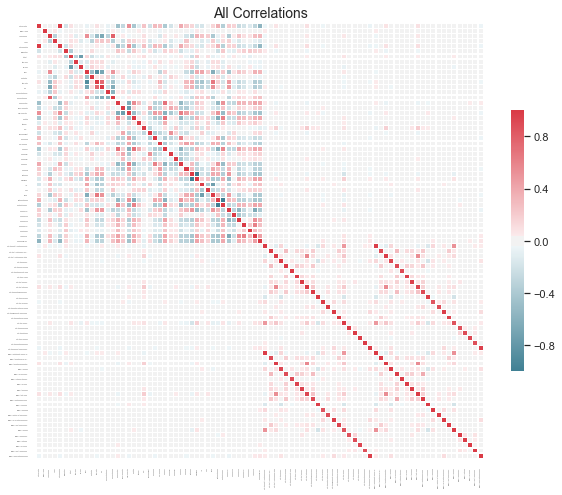

In [638]:
fs.plot_collinear(plot_all = True)

#### Zero Importance Features<br>
Nous allons maintenant rechercher les featurs sans importance selon le modèle d’apprentissage gradient boosting

In [639]:
#Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                            early_stopping =True)
#list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	valid_0's auc: 0.826994	valid_0's binary_logloss: 0.16838
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[35]	valid_0's auc: 0.735609	valid_0's binary_logloss: 0.196331
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.784671	valid_0's binary_logloss: 0.196193
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[33]	valid_0's auc: 0.792641	valid_0's binary_logloss: 0.208308
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[33]	valid_0's auc: 0.799004	valid_0's binary_logloss: 0.18337
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[30]	valid_0's auc: 0.782828	valid_0's binary_logloss: 0.190

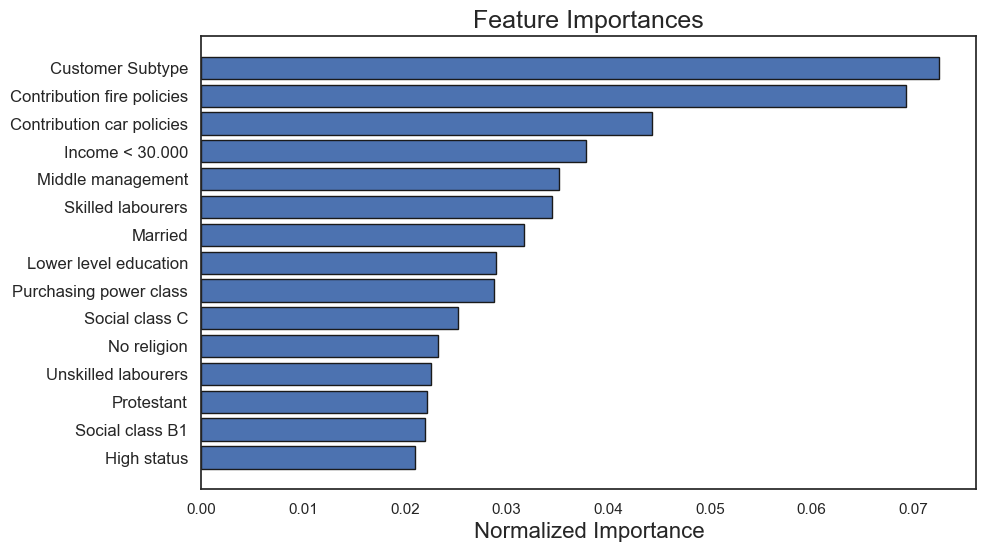

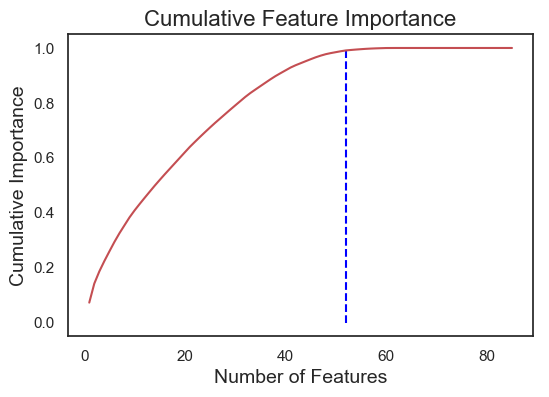

52 features required for 0.99 of cumulative importance


In [640]:
fs.plot_feature_importances(threshold = 0.99)

Le premier graphe est le graphe des features les plus important<br>
<br>
Pour le deuxième graphe nous avons l'importance cumulée par rapport au nombre de features, la ligne verticale est tracée en threshold importance cumulée, dans ce cas 99%<br>
<br>
#### Low Importance Features<br>
On va identifier les features les moins importantes qui ne sont pas nécessaires pour atteindre 99% de l'importance totale

In [641]:
fs.identify_low_importance(cumulative_importance = 0.99)

51 features required for cumulative importance of 0.99 after one hot encoding.
34 features do not contribute to cumulative importance of 0.99.



La low_importance méthode emprunte l'une des méthodes d' utilisation de l'analyse en composantes principales (ACP), dans laquelle il est courant de ne conserver que le PC nécessaire pour conserver un certain pourcentage de la variance (tel que 95%).

**Single Unique Value Features<br>**

Nous allons maintenant chercher toutes les colonnes ayant une seule valeur unique. Une fonctionnalité avec une seule valeur unique ne peut pas être utile pour l'apprentissage.

In [46]:
fs.identify_single_unique ()

0 features with a single unique value.



Donc notre cas on n'a pas de features à valeurs unique

### Eliminer ces features

In [643]:
train_removed = fs.remove (methods = 'all')

['missing', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 37 features.


## Classification

Aprés qu'on a fait un feature engineering on tend à équilibrer les Class donc on va utiliser la méthode
"Synthetic Minority Over-sampling Technique"

In [224]:
from  imblearn.over_sampling import SMOTE
sm = SMOTE(kind='regular')


In [225]:
Xs, ys = sm.fit_sample(X, y)


In [228]:
columns = dataAfterFE.columns

afsam =pd.DataFrame(data=X,columns=columns) 


## Repartition des données

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size = 0.25, random_state = 0)



In [237]:
clf_R_Smote = RandomForestClassifier(n_estimators=55)
clf_R_Smote.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [238]:
PredictionSmote = clf_R_Smote.predict(X_test)
print('\n*Classification RandomForest SMOTE sample:\n', classification_report(y_test,PredictionSmote ))


*Classification RandomForest SMOTE sample:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2285
           1       0.94      0.96      0.95      2333

   micro avg       0.95      0.95      0.95      4618
   macro avg       0.95      0.95      0.95      4618
weighted avg       0.95      0.95      0.95      4618



Text(0,0.5,'Sensibilite')

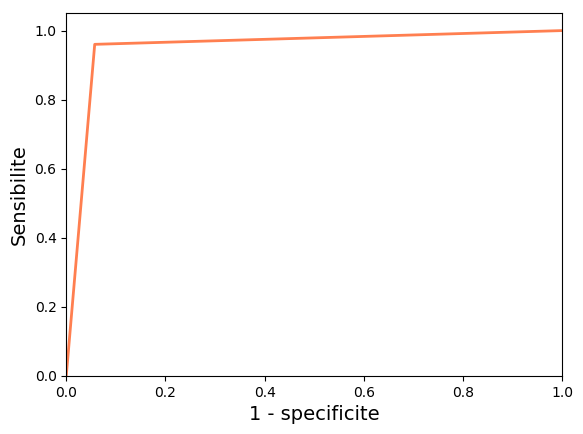

In [239]:
[fpr, tpr, thr] = metrics.roc_curve(y_test, PredictionSmote)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)

plt.ylabel('Sensibilite', fontsize=14)

## Calcul des Scores

In [244]:
PredictionSmote = clf_R_Smote.predict_proba(X_test)[:, 1]




In [247]:
PredictionSmote

array([0.8       , 1.        , 0.27272727, ..., 0.09090909, 0.09090909,
       1.        ])

In [248]:
df = pd.DataFrame({'x':y_test, 'y':PredictionSmote})
df


,x,y
0,1,0.800000
1,1,1.000000
2,0,0.272727
3,1,0.981818
4,0,0.032727
5,1,0.834848
6,0,0.036364
7,0,0.000000
8,0,0.000000
9,0,0.072727


In [260]:
print (metrics.auc(fpr, tpr))
PredictionSmote1 = clf_R_Smote.predict_proba(X_train)[:, 1]
type(PredictionSmote)

0.9514033733484277


numpy.ndarray

## Calcul de seuil

In [263]:
idx = np.min(np.where(tpr > 0.5)) # indice du premier seuil pour lequel
                                   # la sensibilité est supérieure à 0.95
print("Sensibilité : %.2f" % tpr[idx]) 
print("Spécificité : %.2f" % (1-fpr[idx])) 
print ("Seuil : %.2f" % thr[idx])

Sensibilité : 0.96
Spécificité : 0.94
Seuil : 1.00


**Conclusion**<br/>
Pour couvrir la moitié de la clientèle on peut fixer un seuil de 1 de scoring c'est qui est trés logique pour des donnnées redressé avec smote (presque 50% de l'echantillion nous disent 'Yes') mais Pour arriver à bien analyser les caractéristiques des regions qu'on doit cibler on doit reférer au celles des données synthétiques et non pas aux données originaux pour ce seuil calculés.